### Import libraries

In [73]:
# Import library
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler, RobustScaler
from sklearn.compose import make_column_transformer

### Import files

In [74]:
anime_data = pd.read_csv('../anime_cleaned.csv')

### Removing some blank data

In [75]:
anime_data['episodes'].replace('', np.nan, inplace=True)
anime_data.dropna(subset=['episodes'], inplace=True)
anime_data['episodes'] = anime_data['episodes'].astype('int64')

### Init

In [76]:
linreg = LinearRegression()
gbm = GradientBoostingRegressor()

In [77]:
boardcast_cat = ['Sundays',
                 'Mondays',
                 'Tuesdays',
                 'Wednesdays',
                 'Thursdays',
                 'Fridays',
                 'Saturdays',
                 'Not schedule',
                 'Unknown']

### Helper function

In [78]:
def start_pipeline(predictors, numeric_predictors, cat_predictors_nominal, cat_predictors_ordinal, response):
    # Extract Response and Predictors
    y = pd.DataFrame(anime_data[response])
    X = pd.DataFrame(anime_data[predictors])

    oe = OrdinalEncoder(categories=[boardcast_cat])
    ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
    
    oe.fit_transform(X[cat_predictors_ordinal])
    ohe.fit_transform(X[cat_predictors_nominal])

    column_transformer = make_column_transformer(
        (RobustScaler(), numeric_predictors),
        (oe, cat_predictors_ordinal),
        (ohe, cat_predictors_nominal))
        
    column_transformer.fit_transform(X)
    
    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    
    # Linear Regression using Train Data
    lm_pipeline = make_pipeline(column_transformer, linreg)
    gbm_pipeline = make_pipeline(column_transformer, gbm)
    gbm_pipeline.fit(X_train, y_train)
    lm_pipeline.fit(X_train, y_train)        
    
    # Coefficients of the Linear Regression line
    print('Intercept of Regression \t: b = ', linreg.intercept_)
    print('Coefficients of Regression \t: a = ', linreg.coef_)
    print()
    
    # Print the Coefficients against Predictors
    print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
    print()
    
    # Predict Response corresponding to Predictors
    y_train_pred = lm_pipeline.predict(X_train)
    y_test_pred =  lm_pipeline.predict(X_test)

    y_gbm_train_pred = gbm_pipeline.predict(X_train)
    y_gbm_test_pred = gbm_pipeline.predict(X_test)
    
    # Plot the Predictions vs the True values
    f, axes = plt.subplots(2, 2, figsize=(24, 12))
    axes[0][0].scatter(y_train, y_train_pred, color = "blue")
    axes[0][0].plot(y_train, y_train, 'w-', linewidth = 1)
    axes[0][0].set_xlabel("True values of the Response Variable (Train)")
    axes[0][0].set_ylabel("Predicted values of the Response Variable (Train)")
    axes[1][0].scatter(y_test, y_test_pred, color = "green")
    axes[1][0].plot(y_test, y_test, 'w-', linewidth = 1)
    axes[1][0].set_xlabel("True values of the Response Variable (Test)")
    axes[1][0].set_ylabel("Predicted values of the Response Variable (Test)")

    axes[0][1].scatter(y_train, y_gbm_train_pred, color = "blue")
    axes[0][1].plot(y_train, y_train, 'w-', linewidth = 1)
    axes[0][1].set_xlabel("GB True values of the Response Variable (Train)")
    axes[0][1].set_ylabel("GB Predicted values of the Response Variable (Train)")
    axes[1][1].scatter(y_test, y_gbm_test_pred, color = "green")
    axes[1][1].plot(y_test, y_test, 'w-', linewidth = 1)
    axes[1][1].set_xlabel("GB True values of the Response Variable (Test)")
    axes[1][1].set_ylabel("GB Predicted values of the Response Variable (Test)")
    plt.show()
    
    print("Linear Regression")
    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", lm_pipeline.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print()
    
    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", lm_pipeline.score(X_test, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    print()

    print("Gradient Boosting")
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", gbm_pipeline.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_gbm_train_pred))
    print()
    
    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", gbm_pipeline.score(X_test, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_gbm_test_pred))
    print()

    return (lm_pipeline, gbm_pipeline)

### Predicting `score`

/Users/suzanna/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Intercept of Regression 	: b =  [7.30518319]
Coefficients of Regression 	: a =  [[-4.85744873e-01  1.19988608e-02  5.13116755e-02 -1.60215851e-04
   1.50902172e-02  8.23543746e-02 -8.68140792e-02  1.82965616e-01
  -2.09700787e-01 -1.33264558e-01  7.01725404e-02 -4.02642885e-01
  -4.07358294e-01  2.98814736e-01  5.80880078e-02 -2.10703285e-02
   2.03722696e-01 -4.44808452e-01  1.79572899e-02 -2.58216648e-01
   7.11157374e-02  9.63594818e-01 -8.75143300e-02  8.57948363e-02
  -8.70757369e-02  1.36511503e-02  6.52993703e-02  9.84470992e-03
  -4.18551174e-02  1.96805578e-03  1.45734504e-01  7.20121367e-02
   1.86797876e-02  8.36037203e-02  8.71794135e-03  1.34103086e-01
   2.19064734e-02 -5.25644970e-02 -5.26106530e-02  2.23884927e-02
  -2.85700925e-01 -1.48667400e-01  1.17156583e-01 -4.48721881e-02
   1.80386747e-02  5.04227283e-04 -8.38104720e-02  1.29553287e-01
  -6.42857167e-02  1.04313345e-01 -1.69168106e-03  6.66770859e-02
   4.28292739e-02  3.36961771e-02 -2.45824201e-01  1.10562803e

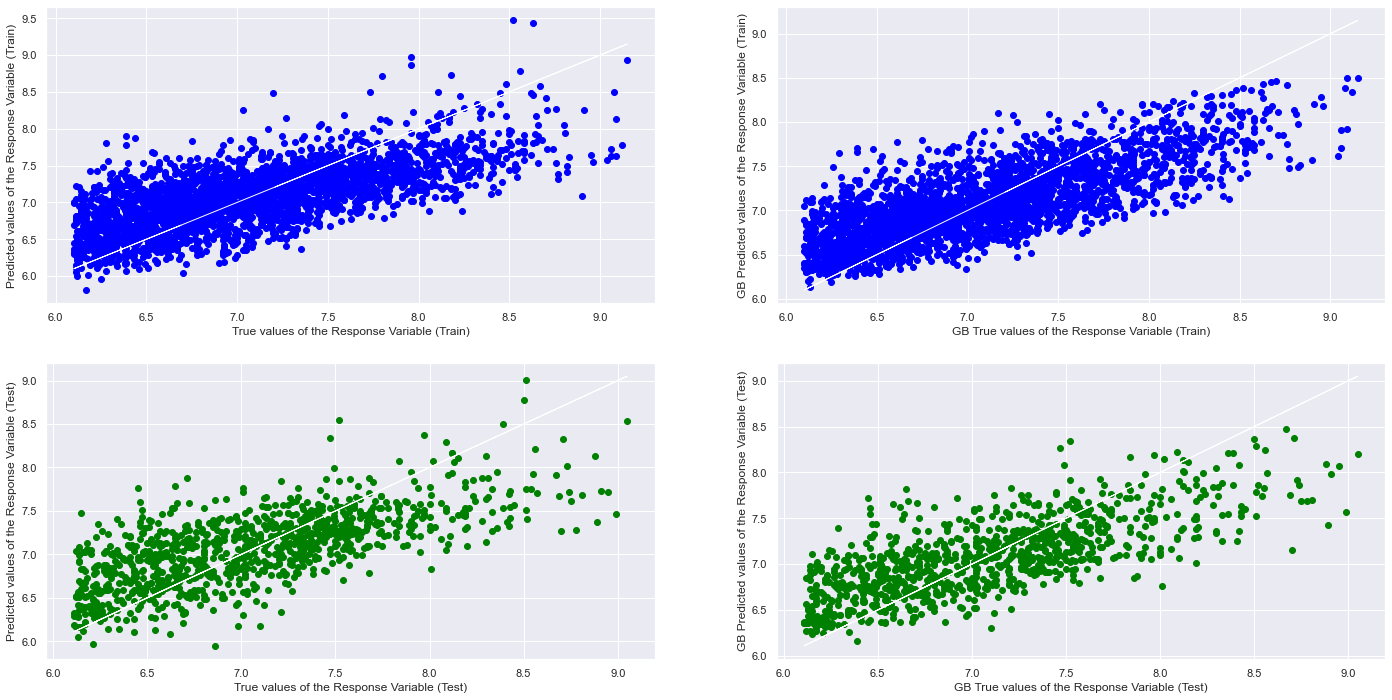

Linear Regression
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.48080304143074326
Mean Squared Error (MSE) 	: 0.198728714112356

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.47698875872753044
Mean Squared Error (MSE) 	: 0.20036842769434565

Gradient Boosting
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5838549282504595
Mean Squared Error (MSE) 	: 0.1592843980074062

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5362894032304896
Mean Squared Error (MSE) 	: 0.1776500309130245



In [79]:
numeric_data = ['popularity', 'duration', 'scored_by_users']
cat_data = ['source', 'demographic', 'main genre',
            'premiered', 'rating', 'status', 'type', 'theme']

cat_ordinal_data = ['broadcast']
all_data = numeric_data+cat_data+cat_ordinal_data

(lm_pipeline, gbm_pipeline) = start_pipeline(all_data, numeric_data, cat_data, cat_ordinal_data, 'score')


#### Prediction

In [80]:
# Extract Pokemons for Prediction
anime_pred = anime_data[anime_data["title"].isin(["Steins;Gate",
                                                 "Dr. Stone", 
                                                 "One Piece",
                                                 "Mobile Suit Gundam 00",
                                                 "Naruto: Shippuuden",
                                                 "Jujutsu Kaisen",
                                                 "Re:Zero kara Hajimeru Isekai Seikatsu 2nd Season Part 2",
                                                 "Magical Nyan Nyan Taruto",
                                                 "Shingeki no Kyojin: The Final Season Part 2",
                                                 "Death Note",
                                                 "Tokyo Ghoul",
                                                 "Tokyo Ghoul:re",
                                                 "Princess Princess",
                                                 "Ultraman"])]

In [81]:
# Extract Predictors for Prediction
X_pred = pd.DataFrame(anime_pred[all_data])

# Predict Response corresponding to Predictors
y_pred = lm_pipeline.predict(X_pred)
gb_y_pred = gbm_pipeline.predict(X_pred)

In [82]:
# Summarize the Actuals, Predictions and Errors
y_pred = pd.DataFrame(y_pred, columns = ["pred_score"], index = anime_pred.index)
animedata_acc = pd.concat([anime_pred[["title", "score"]], y_pred], axis = 1)

y_errs = 100 * abs(animedata_acc["score"] - animedata_acc["pred_score"]) / animedata_acc["score"]
y_errs = pd.DataFrame(y_errs, columns = ["error"], index = anime_pred.index)
animedata_acc= pd.concat([animedata_acc, y_errs], axis = 1)

animedata_acc

,title,score,pred_score,error
1,Shingeki no Kyojin: The Final Season Part 2,9.12,7.777785,14.717269
2,Steins;Gate,9.09,8.135147,10.504429
43,Re:Zero kara Hajimeru Isekai Seikatsu 2nd Seas...,8.51,7.508986,11.762792
100,Jujutsu Kaisen,7.71,7.221045,6.341822
650,Dr. Stone,8.30,8.128764,2.063081
938,Naruto: Shippuuden,8.23,8.446738,2.633506
1687,Princess Princess,6.99,7.363053,5.336956
1759,Mobile Suit Gundam 00,8.12,7.407994,8.768552
2276,Death Note,8.63,9.433719,9.313078
2277,One Piece,8.62,8.488190,1.529115


In [83]:
# Summarize the Actuals, Predictions and Errors
gb_y_pred = pd.DataFrame(gb_y_pred, columns = ["pred_score"], index = anime_pred.index)
animedata_acc_gb = pd.concat([anime_pred[["title", "score"]], gb_y_pred], axis = 1)

gb_y_errs = 100 * abs(animedata_acc_gb["score"] - animedata_acc_gb["pred_score"]) / animedata_acc_gb["score"]
gb_y_errs = pd.DataFrame(gb_y_errs, columns = ["error"], index = anime_pred.index)
animedata_acc_gb= pd.concat([animedata_acc_gb, gb_y_errs], axis = 1)

animedata_acc_gb

,title,score,pred_score,error
1,Shingeki no Kyojin: The Final Season Part 2,9.12,8.345177,8.495864
2,Steins;Gate,9.09,8.495174,6.543743
43,Re:Zero kara Hajimeru Isekai Seikatsu 2nd Seas...,8.51,7.783690,8.534782
100,Jujutsu Kaisen,7.71,6.961815,9.704091
650,Dr. Stone,8.30,8.048455,3.030666
938,Naruto: Shippuuden,8.23,8.185968,0.535017
1687,Princess Princess,6.99,7.283334,4.196475
1759,Mobile Suit Gundam 00,8.12,7.391798,8.968006
2276,Death Note,8.63,8.434640,2.263736
2277,One Piece,8.62,8.342560,3.218566
